In [1]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [64]:
from svmutil import *
from matplotlib import pyplot as plt
import gc
import numpy as np
from sklearn.metrics import f1_score
import matplotlib
from sklearn.metrics import classification_report

matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30

In [3]:
yTrain, xTrain = svm_read_problem("processedData/trainSetspambase")
y, x = svm_read_problem("processedData/testSetspambase")

## Load LibSVM formatted data

In [4]:
validationSetLength = int(len(x) * 0.6)
xValidation = x[0:validationSetLength]
xTest = x[validationSetLength:]
yValidation = y[0:validationSetLength]
yTest = y[validationSetLength:]

## Define training problem

In [5]:
trainingSamples  = svm_problem(yTrain, xTrain)

## Cost parameter for grid search

In [6]:
cost = np.arange(0.5, 100, 0.5)

## Perform grid Search

In [20]:
bestModel = None
bestMSE = 0
accuracy = []
mse = []
squaredCorrelationCoefficient = []
f1 = []

for c in cost:
    param = svm_parameter('-c '+str(c))
    model = svm_train(trainingSamples, param)
    predictionLabels, predictionAccuracy, predictionValue = svm_predict(yValidation, xValidation, model)
    
    f1.append(f1_score(yValidation, predictionLabels))
    accuracy.append(predictionAccuracy[0])
    mse.append(predictionAccuracy[1])
    squaredCorrelationCoefficient.append(predictionAccuracy[2])
    
    
    if bestModel == None or bestMSE > predictionAccuracy[1]: 
        bestModel = model
        bestMSE = predictionAccuracy[1]

Accuracy = 81.5217% (675/828) (classification)
Accuracy = 83.3333% (690/828) (classification)
Accuracy = 83.5749% (692/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.4203% (699/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 85.0242% (704/828) (classification)
Accuracy = 85.1449% (705/828) (classification)
Accuracy = 84.9034% (703/828) (classification)
Accuracy = 84.9034% (703/828) (classification)
Accuracy = 85.2657% (706/828) (classification)
Accuracy = 85.2657% (706/828) (classification)
Accuracy = 85.1449% (705/828) (classification)
Accuracy = 85.2657% (706/828) (classification)
Accuracy = 85.2657% (706/828) (classification)
Accuracy = 85.3865% (707/828) (classification)
Accuracy = 85.3865% (707/828) (classification)
Accuracy = 85.2657% (706/828) (classification)
Accuracy = 85.1449% (705/828) (classification)
Accuracy = 85.1449% (705/828) (classification)
Accuracy = 85.1449% (705/828) (classification)
Accuracy = 85

Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84.6618% (701/828) (classification)
Accuracy = 84

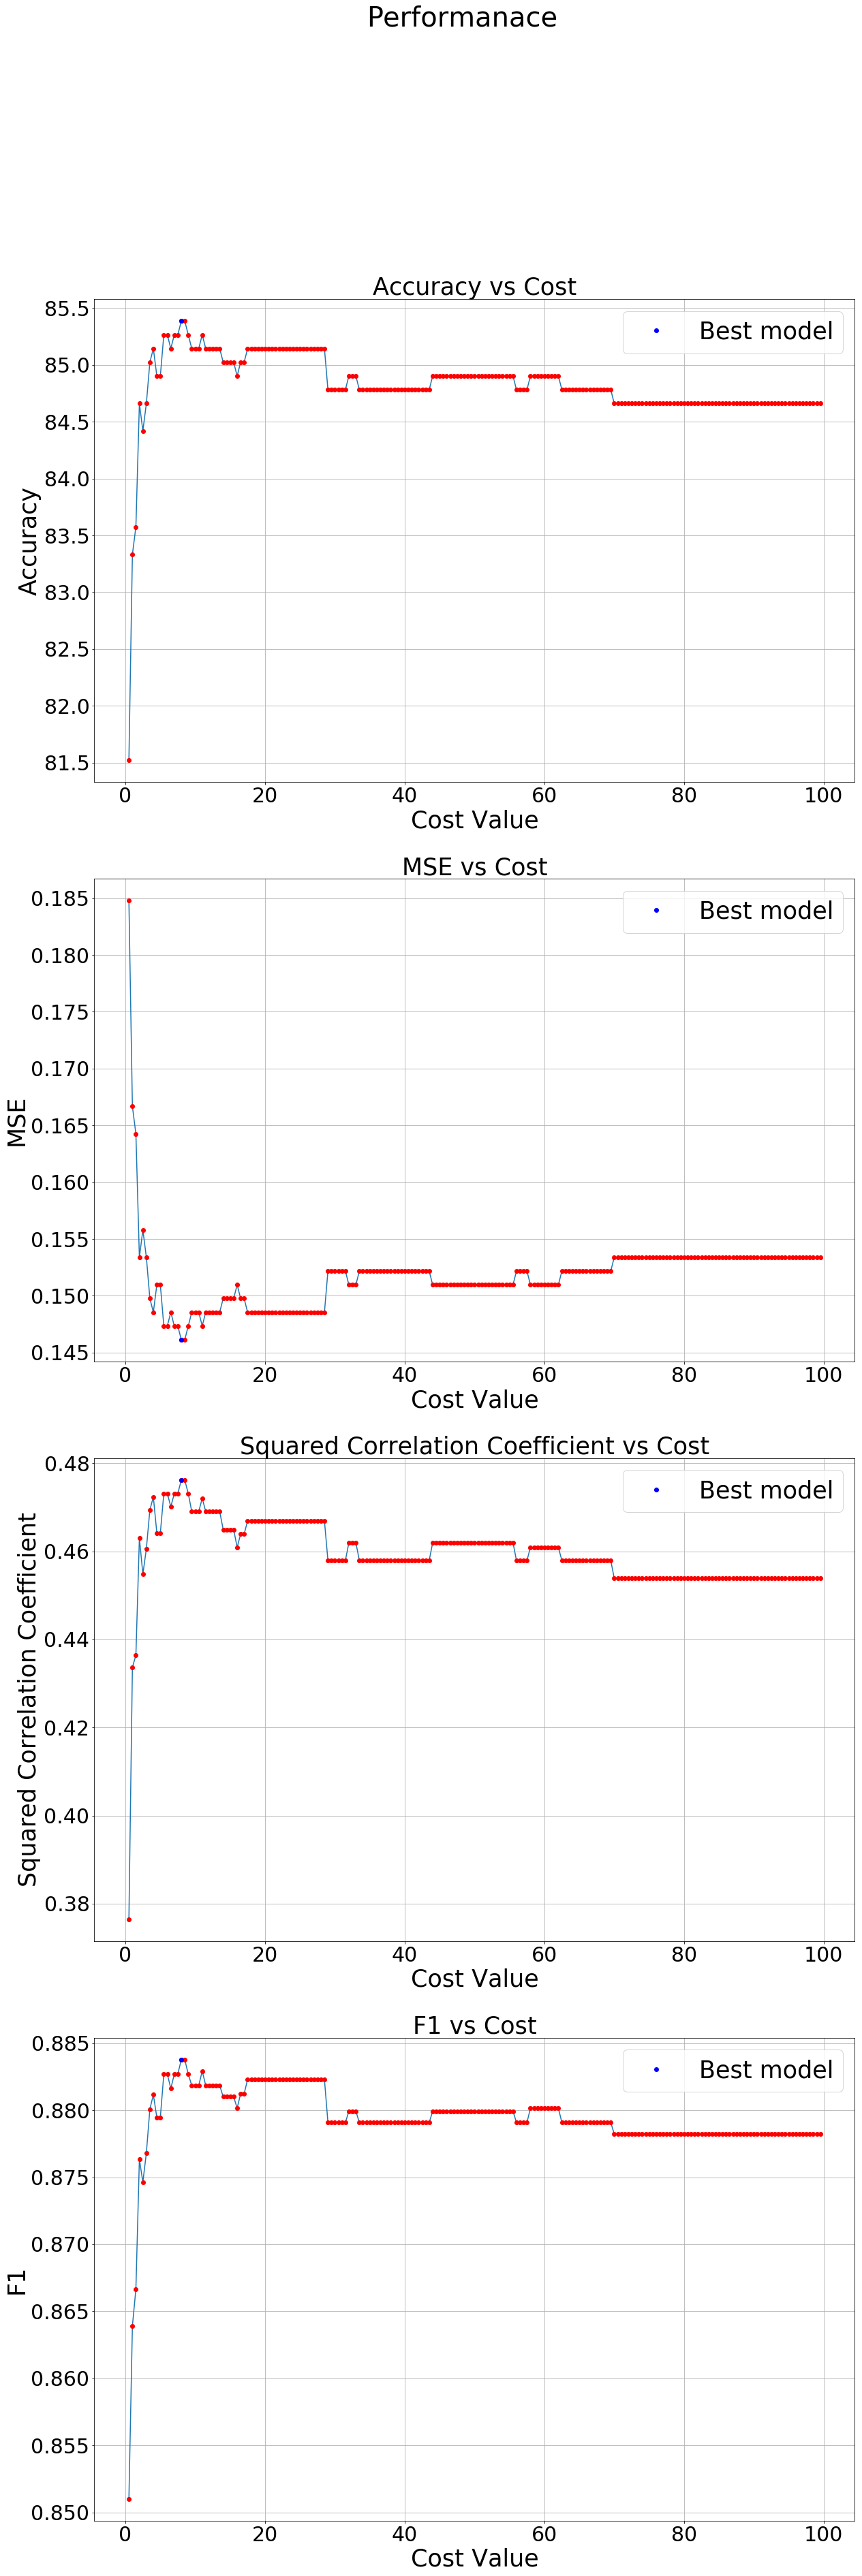

In [62]:
fig, axs = plt.subplots(4, 1, figsize=(20, 60))
fig.suptitle("Performanace", fontsize = 40)
axs[0].plot(cost, accuracy)
axs[0].plot(cost, accuracy, "ro")

axs[0].plot(bestModel.param.C, accuracy[np.where(cost==bestModel.param.C)[0][0]],"bo", label = "Best model")
axs[0].grid()
axs[0].set_xlabel('Cost Value', fontsize = 35)
axs[0].set_ylabel('Accuracy', fontsize = 35)
axs[0].set_title("Accuracy vs Cost", fontsize = 35)
axs[0].legend(prop={'size': 35})


axs[1].plot(cost, mse)
axs[1].plot(cost, mse, "ro")
axs[1].plot(bestModel.param.C, mse[np.where(cost==bestModel.param.C)[0][0]],"bo", label = "Best model")
axs[1].grid()
axs[1].set_xlabel('Cost Value', fontsize = 35)
axs[1].set_ylabel('MSE', fontsize = 35)
axs[1].set_title("MSE vs Cost", fontsize = 35)
axs[1].legend(prop={'size': 35})

axs[2].plot(cost, squaredCorrelationCoefficient)
axs[2].plot(cost, squaredCorrelationCoefficient, "ro")
axs[2].plot(bestModel.param.C, squaredCorrelationCoefficient[np.where(cost==bestModel.param.C)[0][0]],"bo", label = "Best model")
axs[2].grid()
axs[2].set_xlabel('Cost Value', fontsize = 35)
axs[2].set_ylabel('Squared Correlation Coefficient', fontsize = 35)
axs[2].set_title("Squared Correlation Coefficient vs Cost", fontsize = 35)
axs[2].legend(prop={'size': 35})


axs[3].plot(cost, f1)
axs[3].plot(cost, f1, "ro")
axs[3].plot(bestModel.param.C, f1[np.where(cost==bestModel.param.C)[0][0]],"bo", label = "Best model")
axs[3].grid()
axs[3].set_xlabel('Cost Value', fontsize = 35)
axs[3].set_ylabel('F1', fontsize = 35)
axs[3].set_title("F1 vs Cost", fontsize = 35)
axs[3].legend(prop={'size': 35})



plt.show()

## Check performanace on test set

In [63]:
predictionLabels, predictionAccuracy, predictionValue = svm_predict(yTest,xTest ,bestModel)

Accuracy = 87.5% (483/552) (classification)
